**Telecom Customer Churn**

---

# 1) IMPORTAR PAQUETES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as pylab 
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats 
from sklearn import metrics as mt

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)

# 2) ENTENDIENDO LA DATA

## 2.1) Cargando la data

In [2]:
# Seleccion de Variables a usar en este BASELINE:
features_iniciales = ['ID',
 'Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'ProteccionDispositivo',
 'SoporteTecnico',
 'FacturacionElectronica',
 'MontoCargadoMes']

In [3]:

path = "../input/"
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

## 2.2) Exploración de la data

### 2.2.1) Estadísticos básicos

In [4]:
df_train.shape, df_test.shape

((3800, 21), (777, 21))

In [5]:
df_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,Si,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,No,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.3,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,No,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,Si,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [6]:
df_test.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID05641,Masculino,0.0,No,Si,40.0,Si,No,DSL,Si,Si,No,No,No,No,Mes a mes,Si,Checke electronico,55.25,2139.20,1
1,ID04573,Femenino,NaN,No,No,30.0,Si,Si,Fibra Optica,No,Si,No,No,Si,Si,Mes a mes,Si,Checke por correo,99.70,2967.35,1
2,ID02010,Masculino,0.0,No,No,41.0,Si,Si,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,Si,Tarjeta de credito (automatico),25.25,996.45,0
3,ID06368,Femenino,0.0,Si,Si,19.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Bianual,No,Checke electronico,20.15,387.70,0
4,ID00434,Femenino,0.0,No,No,35.0,Si,Si,Fibra Optica,No,No,No,Si,No,No,Mes a mes,No,Transferencia bancaria (automatico),80.05,2835.90,0


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 21 columns):
ID                        3800 non-null object
Sexo                      3800 non-null object
AdultoMayor               3746 non-null float64
Socio                     3774 non-null object
Dependientes              3800 non-null object
MesesCliente              3796 non-null float64
ServicioTelefonico        3800 non-null object
LineasMultiples           3800 non-null object
ServicioInternet          3800 non-null object
SeguridadOnline           3718 non-null object
RespaldoOnline            3718 non-null object
ProteccionDispositivo     3718 non-null object
SoporteTecnico            3718 non-null object
TransmisionTV             3718 non-null object
TransmisionPeliculas      3718 non-null object
TerminoContrato           3800 non-null object
FacturacionElectronica    3756 non-null object
MetodoPago                3800 non-null object
MontoCargadoMes           3469 non-null float

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 21 columns):
ID                        777 non-null object
Sexo                      777 non-null object
AdultoMayor               757 non-null float64
Socio                     774 non-null object
Dependientes              777 non-null object
MesesCliente              777 non-null float64
ServicioTelefonico        777 non-null object
LineasMultiples           777 non-null object
ServicioInternet          777 non-null object
SeguridadOnline           765 non-null object
RespaldoOnline            765 non-null object
ProteccionDispositivo     765 non-null object
SoporteTecnico            765 non-null object
TransmisionTV             765 non-null object
TransmisionPeliculas      765 non-null object
TerminoContrato           777 non-null object
FacturacionElectronica    775 non-null object
MetodoPago                777 non-null object
MontoCargadoMes           694 non-null float64
MontoCargadoTotal 

In [9]:
# Definiendo tipos
ID = 'ID'
TARGET = 'Churn'

In [10]:
# Distribución del Target
df_train[TARGET].value_counts(dropna=False)

0    2776
1    1024
Name: Churn, dtype: int64

In [11]:
df_train[TARGET].value_counts(dropna=False, normalize = True)*100

0    73.052632
1    26.947368
Name: Churn, dtype: float64

In [12]:
# Generar estadisticos básicos para cada variable:
### count: Count number of non-NA/null observations.	
### unique: Count uniques numbers of non-NA/null observations.
### top: Mean of the values.
### freq: Mean of the values.

### mean: Mean of the values.
### std: Standard deviation of the observations.

### min: Minimum of the values in the object.
### X%: The value of Quartil: 25% - Q1 , 50% - Q2, 75% - Q3
### max: Maximum of the values in the object.

df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(str) # Convertir a variable categorica
df_train.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,3800,3800,ID05400,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sexo,3800,2,Masculino,1941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AdultoMayor,3800,3,0.0,3177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Socio,3774,2,No,1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependientes,3800,2,No,2673,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MesesCliente,3796,NaN,NaN,NaN,32.3567,24.7228,1,9,29,56,72
ServicioTelefonico,3800,2,Si,3426,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LineasMultiples,3800,3,No,1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServicioInternet,3800,3,Fibra Optica,1668,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeguridadOnline,3718,3,No,1879,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_train['AdultoMayor'] = df_train['AdultoMayor'].astype(float) # Convertir a variable numerica

### 2.2.2) EDA (Exploratory Data Analysis)

#### 2.2.2.a) Evaluando Nulos

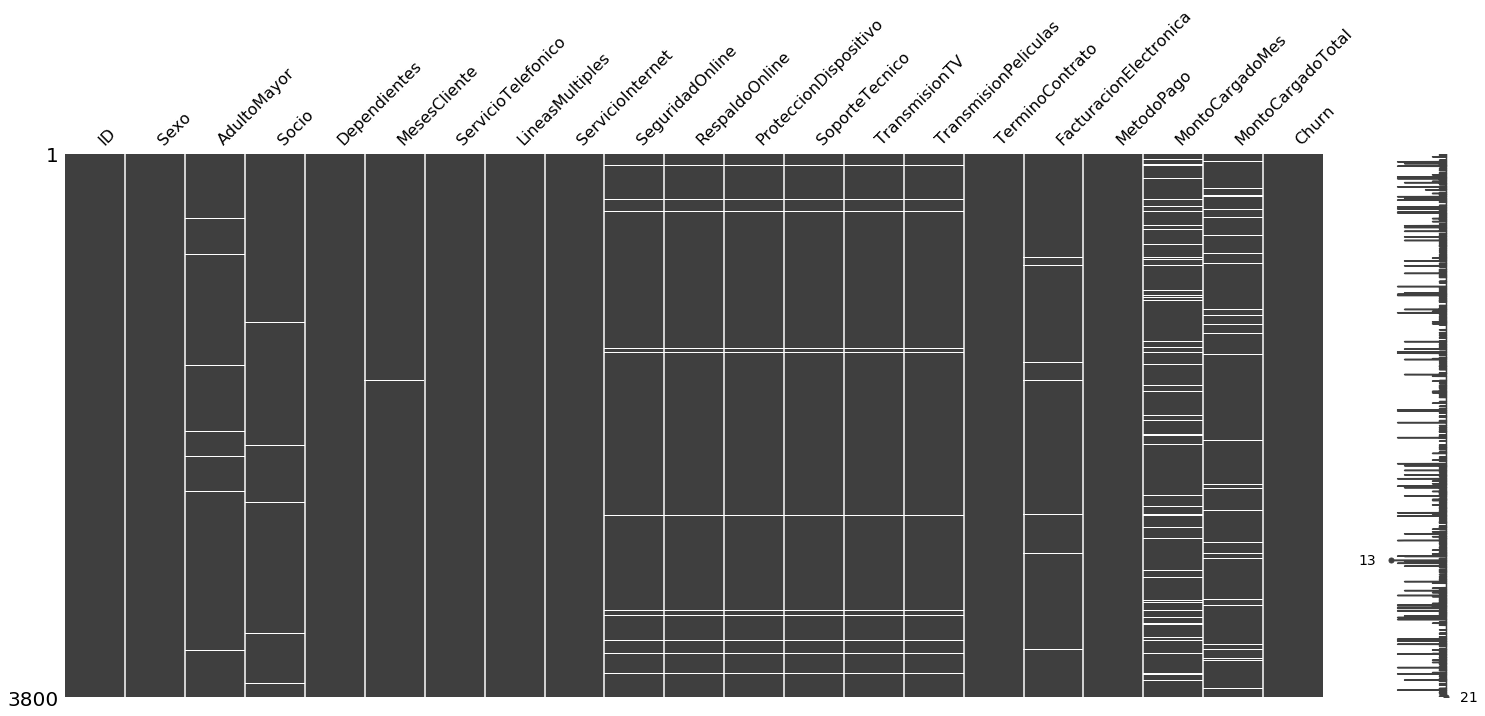

In [14]:
import missingno as msno
msno.matrix(df_train)

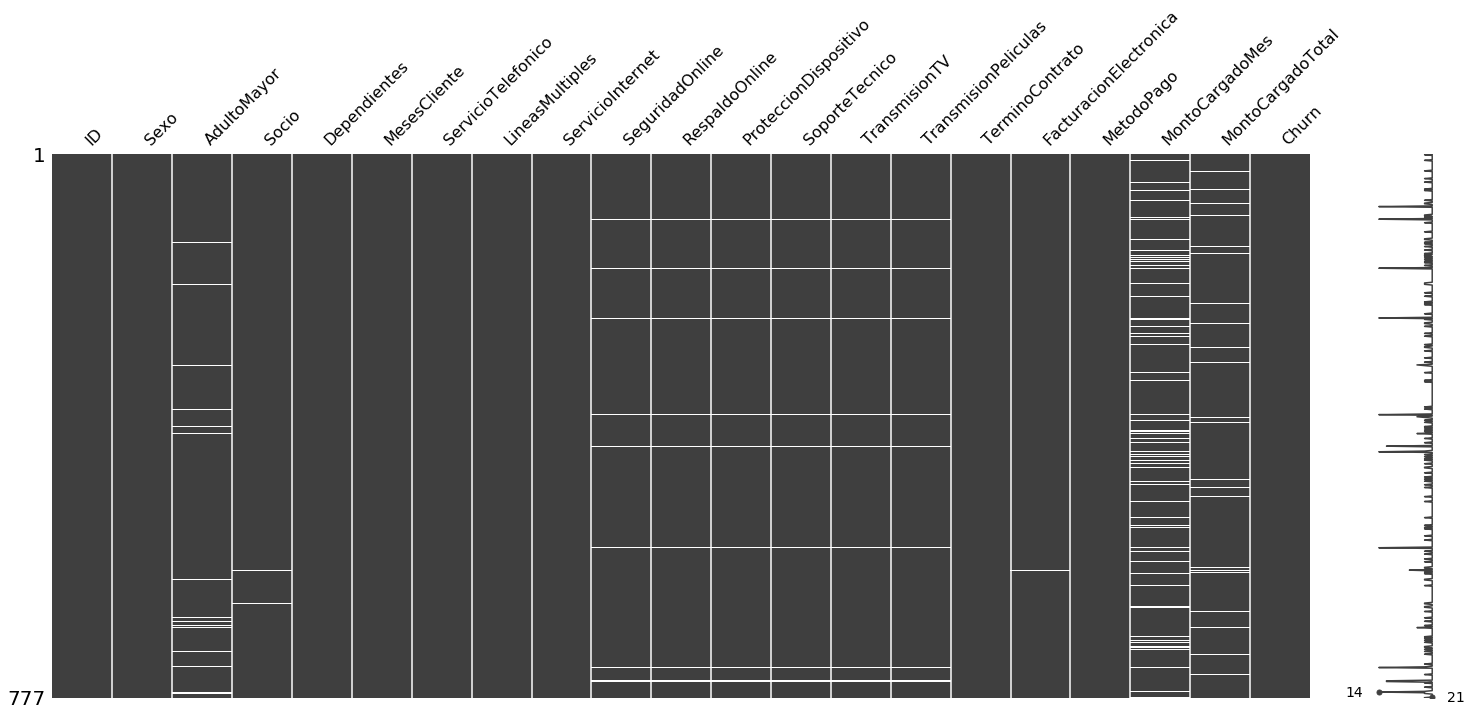

In [15]:
msno.matrix(df_test)

#### 2.2.3.b) Identificando outliers

In [16]:
None

#### 2.2.4.c) Adicionales

In [17]:
None

# 3) Preparación de la data

In [18]:
# Copy dataset and then apply transformation to copied dataset
ds_train = df_train.copy()

In [19]:
ds_test = df_test.copy()

## 3.1) Limpieza de los datos

### 3.1.1) Imputando Nulos

In [20]:
# AdultoMayor (imputacion por MODA)
ds_train["AdultoMayor"].fillna(0, inplace = True)
ds_test["AdultoMayor"].fillna(0, inplace = True)

# MesesCliente (imputacion por MEDIA)
ds_train["MesesCliente"].fillna(32, inplace = True)
ds_test["MesesCliente"].fillna(32, inplace = True)

# ProteccionDispositivo (imputacion por MODA)
ds_train["ProteccionDispositivo"].fillna('No', inplace = True)
ds_test["ProteccionDispositivo"].fillna('No', inplace = True)

# SoporteTecnico (imputacion por MODA)
ds_train["SoporteTecnico"].fillna('No', inplace = True)
ds_test["SoporteTecnico"].fillna('No', inplace = True)

# FacturacionElectronica (imputacion por MODA)
ds_train["FacturacionElectronica"].fillna('Si', inplace = True)
ds_test["FacturacionElectronica"].fillna('Si', inplace = True)

# MontoCargadoMes (imputacion por MEDIA)
ds_train["MontoCargadoMes"].fillna(68.7, inplace = True)
ds_test["MontoCargadoMes"].fillna(68.7, inplace = True)



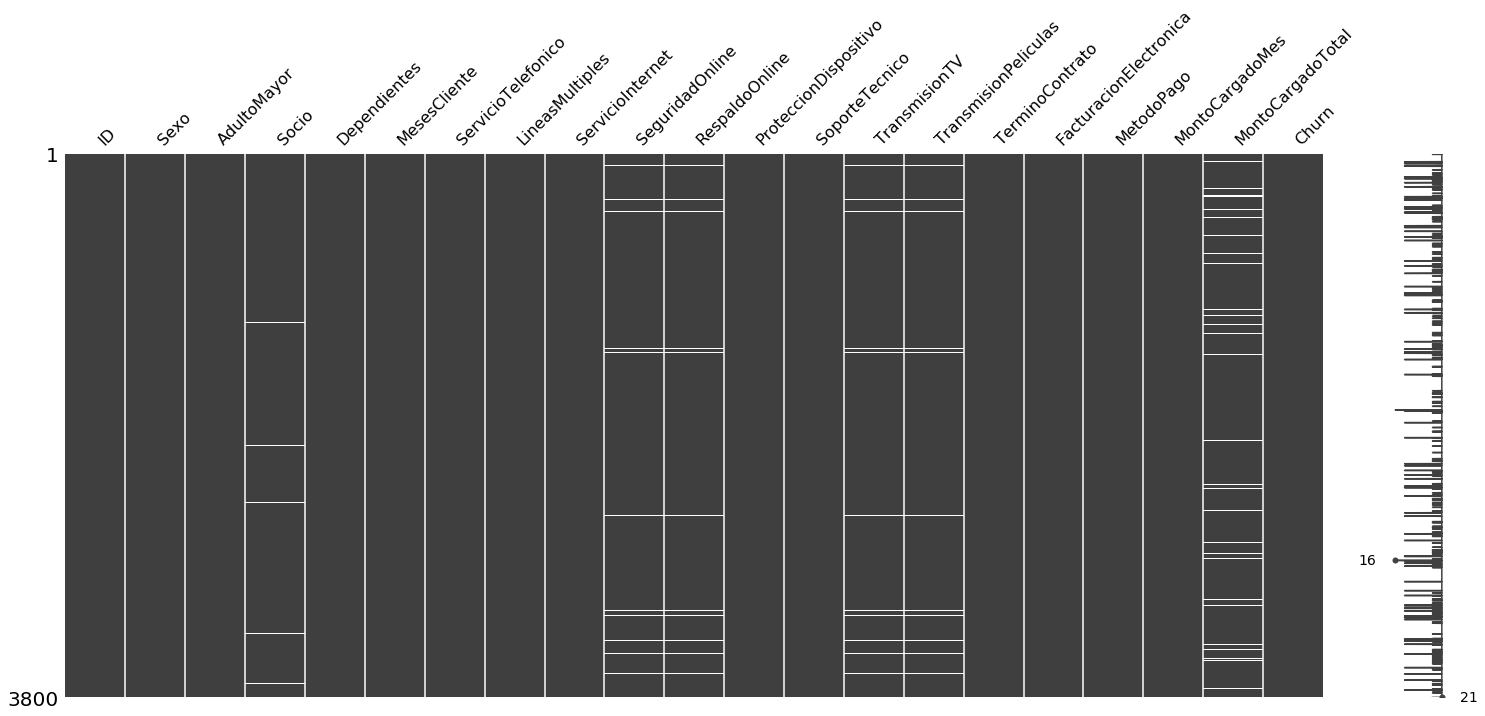

In [21]:
msno.matrix(ds_train)

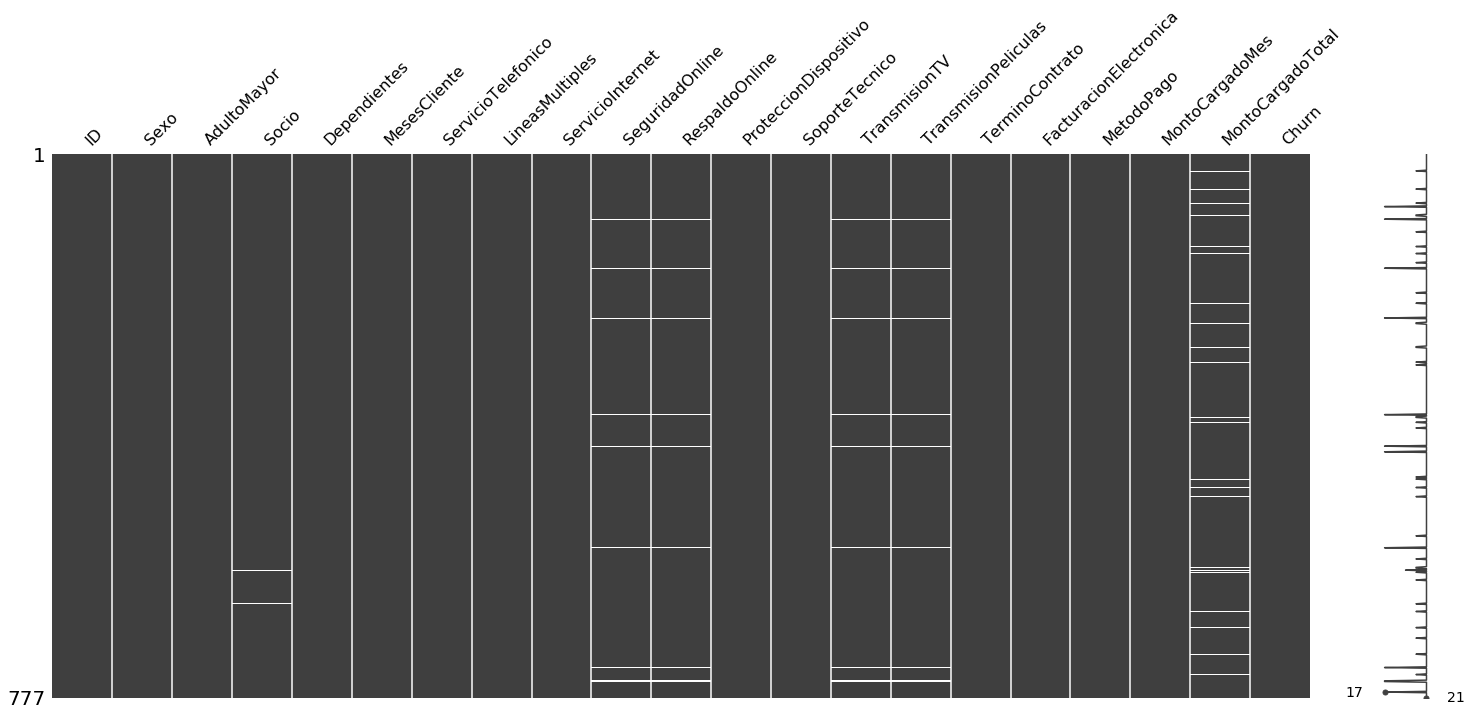

In [22]:
msno.matrix(ds_test)

### 3.1.2) Tratando outliers

In [23]:
None

## 3.2) Transformando la data (Encoding)

In [24]:
ds_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,ProteccionDispositivo,SoporteTecnico,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn
0,ID01802,Masculino,1.0,No,No,11.0,Si,Si,DSL,Si,Si,No,No,No,No,Mes a mes,No,Tarjeta de credito (automatico),60.25,662.95,0
1,ID05696,Masculino,0.0,No,No,1.0,Si,No,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,No,Checke electronico,20.05,20.05,0
2,ID03166,Femenino,0.0,Si,Si,8.0,Si,No,Fibra Optica,No,No,Si,No,Si,Si,Mes a mes,Si,Checke por correo,94.20,777.3,1
3,ID00104,Masculino,0.0,Si,Si,50.0,No,Sin servicio telefonico,DSL,Si,No,No,No,Si,No,Mes a mes,Si,Transferencia bancaria (automatico),39.45,2021.35,0
4,ID05060,Femenino,0.0,No,No,71.0,Si,Si,Fibra Optica,Si,Si,Si,Si,Si,Si,Bianual,Si,Checke por correo,118.65,NaN,0


In [25]:
# Sexo 
dicc_sexo = {'Masculino': 1, 'Femenino':0 }
ds_train["Sexo"] = ds_train["Sexo"].map(dicc_sexo)
ds_test["Sexo"] = ds_test["Sexo"].map(dicc_sexo)

In [26]:
# ServicioTelefonico 
dicc_serv_telef = {'Si': 1, 'No':0 }
ds_train["ServicioTelefonico"] = ds_train["ServicioTelefonico"].map(dicc_serv_telef)
ds_test["ServicioTelefonico"] = ds_test["ServicioTelefonico"].map(dicc_serv_telef)

In [27]:
# LineasMultiples 
dicc_lin_mult = {'Si': 2, 'No':1, 'Sin servicio telefonico':0 }
ds_train["LineasMultiples"] = ds_train["LineasMultiples"].map(dicc_lin_mult)
ds_test["LineasMultiples"] = ds_test["LineasMultiples"].map(dicc_lin_mult)

In [28]:
# FacturacionElectronica 
dicc_fact_elect = {'Si': 1, 'No':0 }
ds_train["FacturacionElectronica"] = ds_train["FacturacionElectronica"].map(dicc_fact_elect)
ds_test["FacturacionElectronica"] = ds_test["FacturacionElectronica"].map(dicc_fact_elect)

In [29]:
# Crear Features Dummies
ds_train = pd.get_dummies(ds_train, columns=['ProteccionDispositivo','SoporteTecnico'])
ds_test = pd.get_dummies(ds_test, columns=['ProteccionDispositivo','SoporteTecnico'])

In [30]:
ds_train.head()

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn,ProteccionDispositivo_No,ProteccionDispositivo_Si,ProteccionDispositivo_Sin servicio de internet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_Sin servicio de internet
0,ID01802,1,1.0,No,No,11.0,1,2,DSL,Si,Si,No,No,Mes a mes,0,Tarjeta de credito (automatico),60.25,662.95,0,1,0,0,1,0,0
1,ID05696,1,0.0,No,No,1.0,1,1,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,0,Checke electronico,20.05,20.05,0,0,0,1,0,0,1
2,ID03166,0,0.0,Si,Si,8.0,1,1,Fibra Optica,No,No,Si,Si,Mes a mes,1,Checke por correo,94.20,777.3,1,0,1,0,1,0,0
3,ID00104,1,0.0,Si,Si,50.0,0,0,DSL,Si,No,Si,No,Mes a mes,1,Transferencia bancaria (automatico),39.45,2021.35,0,1,0,0,1,0,0
4,ID05060,0,0.0,No,No,71.0,1,2,Fibra Optica,Si,Si,Si,Si,Bianual,1,Checke por correo,118.65,NaN,0,0,1,0,0,1,0


### Encondeando nuestras variables:

In [38]:
lista_obj = []
lista_num = []
for col in ds_train.columns:
    if ds_train[col].dtype == 'object':
        lista_obj.append(col)
    else:
        lista_num.append(col)
        pass

In [39]:
lista_obj

['ID',
 'Socio',
 'Dependientes',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'MetodoPago',
 'MontoCargadoTotal']

In [40]:
lista_num

['Sexo',
 'AdultoMayor',
 'MesesCliente',
 'ServicioTelefonico',
 'LineasMultiples',
 'FacturacionElectronica',
 'MontoCargadoMes',
 'Churn',
 'ProteccionDispositivo_No',
 'ProteccionDispositivo_Si',
 'ProteccionDispositivo_Sin servicio de internet',
 'SoporteTecnico_No',
 'SoporteTecnico_Si',
 'SoporteTecnico_Sin servicio de internet']

In [41]:
lista_obj.remove('ID')
lista_obj

['Socio',
 'Dependientes',
 'ServicioInternet',
 'SeguridadOnline',
 'RespaldoOnline',
 'TransmisionTV',
 'TransmisionPeliculas',
 'TerminoContrato',
 'MetodoPago',
 'MontoCargadoTotal']

In [42]:
ds_test

,ID,Sexo,AdultoMayor,Socio,Dependientes,MesesCliente,ServicioTelefonico,LineasMultiples,ServicioInternet,SeguridadOnline,RespaldoOnline,TransmisionTV,TransmisionPeliculas,TerminoContrato,FacturacionElectronica,MetodoPago,MontoCargadoMes,MontoCargadoTotal,Churn,ProteccionDispositivo_No,ProteccionDispositivo_Si,ProteccionDispositivo_Sin servicio de internet,SoporteTecnico_No,SoporteTecnico_Si,SoporteTecnico_Sin servicio de internet
0,ID05641,1,0.0,No,Si,40.0,1,1,DSL,Si,Si,No,No,Mes a mes,1,Checke electronico,55.25,2139.20,1,1,0,0,1,0,0
1,ID04573,0,0.0,No,No,30.0,1,2,Fibra Optica,No,Si,Si,Si,Mes a mes,1,Checke por correo,99.70,2967.35,1,1,0,0,1,0,0
2,ID02010,1,0.0,No,No,41.0,1,2,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Mes a mes,1,Tarjeta de credito (automatico),25.25,996.45,0,0,0,1,0,0,1
3,ID06368,0,0.0,Si,Si,19.0,1,1,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Bianual,0,Checke electronico,20.15,387.70,0,0,0,1,0,0,1
4,ID00434,0,0.0,No,No,35.0,1,2,Fibra Optica,No,No,No,No,Mes a mes,0,Transferencia bancaria (automatico),80.05,2835.90,0,1,0,0,0,1,0
5,ID01422,0,0.0,No,No,54.0,1,1,Fibra Optica,Si,Si,Si,Si,Anual,1,Transferencia bancaria (automatico),100.05,5299.65,0,1,0,0,1,0,0
6,ID04562,1,1.0,Si,No,29.0,1,2,Fibra Optica,No,No,Si,Si,Mes a mes,1,Checke por correo,94.45,2653.65,1,1,0,0,1,0,0
7,ID04269,0,1.0,No,No,14.0,1,2,Fibra Optica,No,Si,Si,Si,Mes a mes,1,Checke por correo,104.85,1531.40,1,0,1,0,1,0,0
8,ID00703,1,0.0,Si,Si,69.0,1,2,Fibra Optica,No,No,No,No,Bianual,1,Transferencia bancaria (automatico),79.20,5420.65,0,0,1,0,1,0,0
9,ID02892,0,0.0,Si,No,37.0,1,1,No,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Sin servicio de internet,Anual,1,Tarjeta de credito (automatico),68.70,717.50,0,0,0,1,0,0,1


In [43]:
ds_train.Socio = 0

In [44]:
dict_serv_int = {'DSL':0,'No':1,'Fibra Optica':2}
ds_train['ServicioInternet'] = ds_train.ServicioInternet.map(dict_serv_int)
ds_test['ServicioInternet'] = ds_train.ServicioInternet.map(dict_serv_int)

In [45]:
ds_train['TransmisionTV'].fillna('No',inplace=True)
ds_test['TransmisionTV'].fillna('No',inplace=True)

In [46]:
def replace_my_null(df, list_obj, list_num):
    for col_obj in list_obj:
        if df[col_obj].isna().any():
            moda = df[col_obj].mode()[0]
            df.fillna(moda, inplace=True)
        else:
            pass
    for col_num in list_num:
        if df[col_num].isna().any():
            df.fillna(df[col_num].mean(),inplace=True)

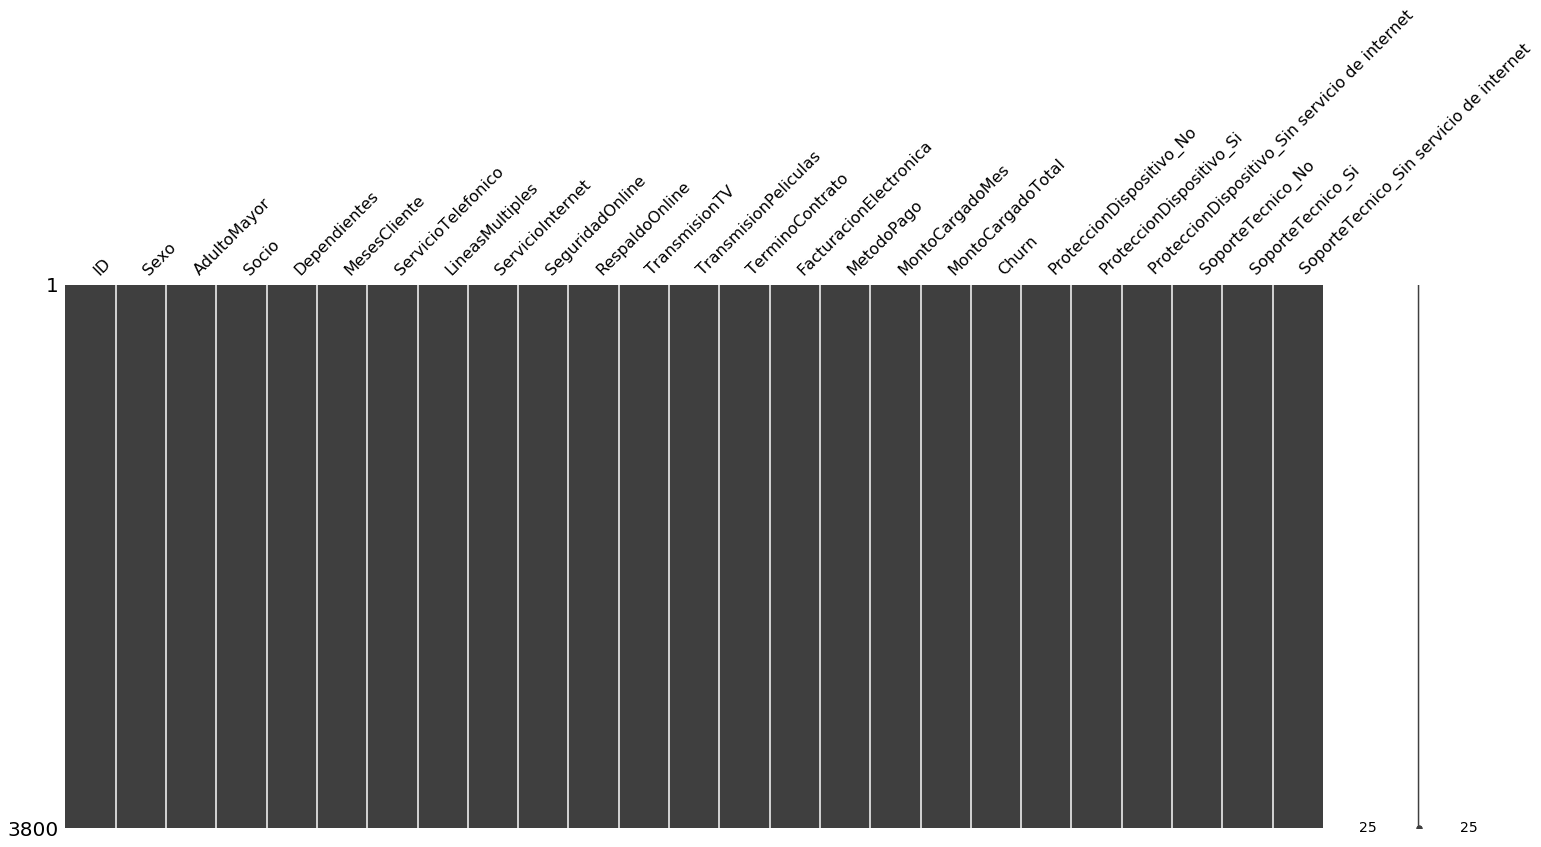

In [50]:
msno.matrix(ds_train)

In [48]:
replace_my_null(ds_train, lista_obj, lista_num)
replace_my_null(ds_test, lista_obj, lista_num)

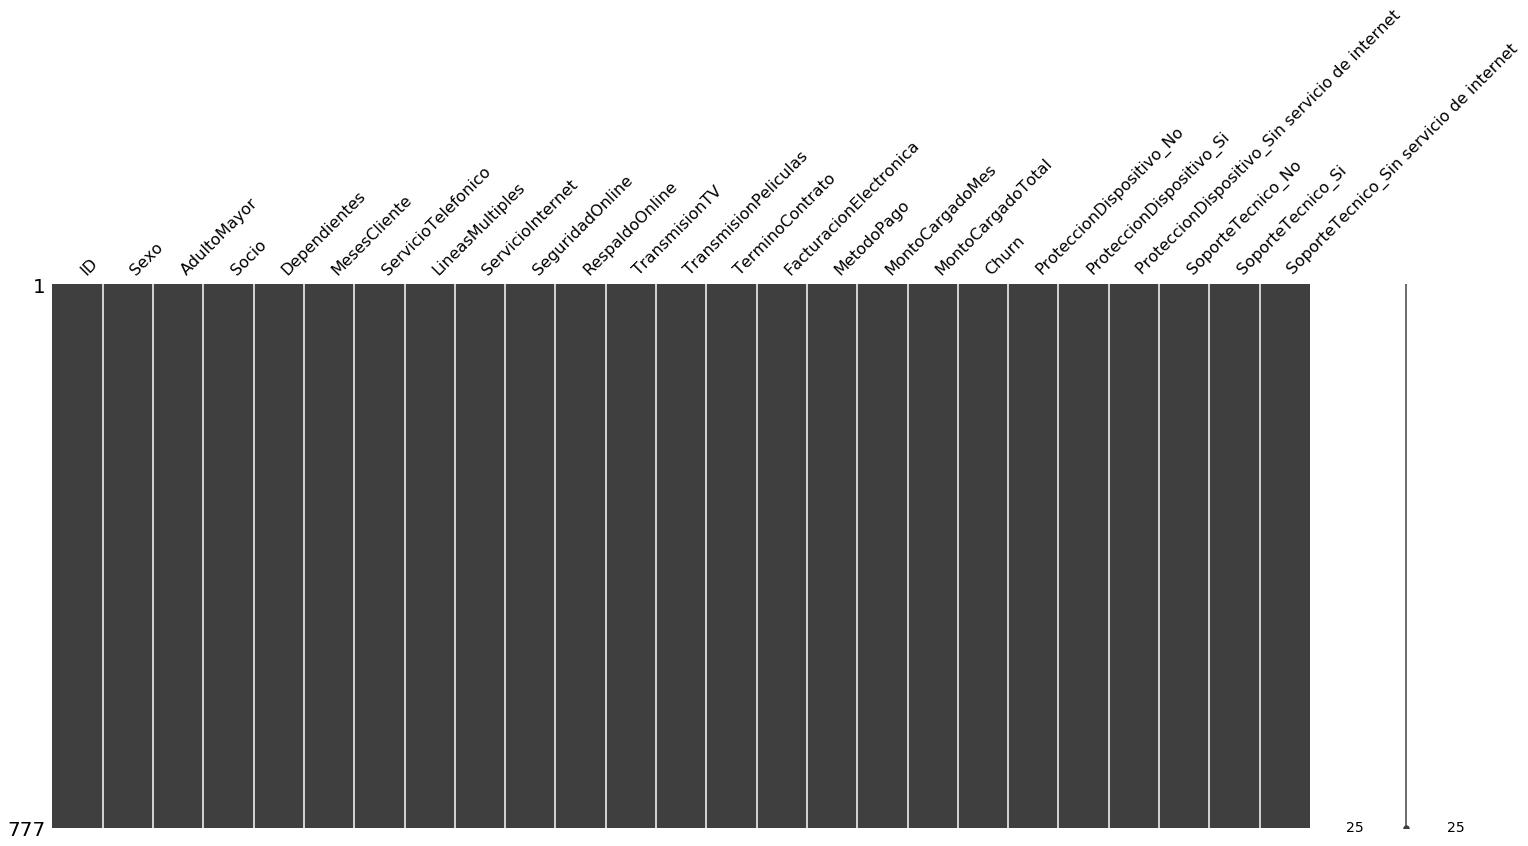

In [49]:
msno.matrix(ds_test)

## 3.3) Feature Engineering

In [ ]:
# New Feature 1
tmp_byAdultoMayor_medianMontoMes = ds_train.groupby(['AdultoMayor'])['MontoCargadoMes'].median().round()
tmp_byAdultoMayor_medianMontoMes

In [ ]:
ds_train['flg_bySexo_mayorMedianMontoMes'] = ds_train.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

ds_test['flg_bySexo_mayorMedianMontoMes'] = ds_test.apply(lambda x: 1 if x.MontoCargadoMes >= tmp_byAdultoMayor_medianMontoMes[x.AdultoMayor] else 0,
                                                       axis = 1)

In [ ]:
ds_train.head(10)

In [ ]:
# New Feature 2,3,4, ...
### Here

In [ ]:
ds_train['MontoCargadoTotal'].isna().sum()

## 3.4) Seleccion de features

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in lista_obj:
    ds_train[col] = le.fit_transform(ds_train[col].values)
    ds_test[col] = le.fit_transform(ds_test[col].values)

TypeError: '<' not supported between instances of 'float' and 'str'

In [ ]:
features_to_model = list(ds_train.columns)

features_to_model.remove(TARGET) # Eliminar variable Target
features_to_model.remove(ID) # Eliminar variable ID

list(features_to_model)

***Select Final Features:***

In [ ]:
# Selección de variables. 
### Una opción es: en base a un modelo basado en árboles, generar la importancia de Variables y seleccionar los features mas importantes.
features_to_model = features_to_model # ['var1', 'var2', 'varn'] 

In [ ]:
len(features_to_model)

In [ ]:
# Features & Target
X = ds_train[features_to_model]
y = ds_train[TARGET]

X_summit = ds_test[features_to_model]

In [ ]:
print("train: ", X.shape,", summit: ", X_summit.shape)

## 3.5) Haciendo nuestra data de train y test

In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size = 0.70, random_state=9)
print((len(X_train), len(y_train)), (len(X_test), len(y_test)))

In [ ]:
X_train.info()

# 4) Evaluando nuestro modelo de forma simple

- En este caso la optimización de los será opcional.

In [ ]:
from sklearn.model_selection import GridSearchCV

## 4.1.A. LogisticRegression

### 4.1.1 Training

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Crear objeto del modelo
model_rlog = LogisticRegression()

params = {'C':[1,3,4,5,6]}

searcher_lg = GridSearchCV(model_rlog, params, cv=5)

searcher_lg.fit(X_train, y_train)

In [ ]:
df_weights = pd.DataFrame({'feature':X_train.columns.values, 'beta': np.round(model_rlog.coef_[0],4) })
df_weights

### 4.1.2 Evaluación del Modelo

In [ ]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [ ]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### ****Find best threshold:****

In [ ]:
list_accuracy_test = []
for threshold in range(0,100):
    pred_0_1 = [1 if x >= threshold/100 else 0 for x in y_pred_proba_test]
    list_accuracy_test.append(mt.accuracy_score(y_test, pred_0_1))

In [ ]:
xs = [x/100 for x in range(0,100)]
ys = list_accuracy_test
plt.plot(xs, ys)

In [ ]:
best_scoring = max(list_accuracy_test)
best_threshold = list_accuracy_test.index(best_scoring)/100
print("El mejor threshold es: {}".format(best_threshold))

In [ ]:
accuracy_train = mt.accuracy_score(y_train, [1 if x >= best_threshold else 0 for x in y_pred_proba_train])
accuracy_test = mt.accuracy_score(y_test, [1 if x >= best_threshold else 0 for x in y_pred_proba_test])

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

## 4.1.B. Árbol de decisión

### 4.1.1 Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier()

In [ ]:
# Create  model objet 
model_tree = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5,random_state=0)

# Fit the model:
model_tree.fit(X_train, y_train)

model = model_tree

### 4.1.2 Evaluación del Modelo

In [ ]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [ ]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### Feature Importances

In [ ]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

In [ ]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

## 4.1.C. Random Forest

### 4.1.1 Training

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

In [ ]:
# Create  model objet 
model_rf = RandomForestClassifier(n_estimators = 150, random_state = 0, max_depth=5, 
                                  max_features = 0.5, min_samples_leaf = 10, 
                                  n_jobs = -1)

# Fit the model:
model_rf.fit(X_train, y_train)

model = model_rf

### 4.1.2 Evaluación del Modelo

In [ ]:
# Generar las predicciones:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Generar las probabilidades
y_pred_proba_train = model.predict_proba(X_train)[:,1]
y_pred_proba_test = model.predict_proba(X_test)[:,1]

In [ ]:
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
accuracy_test = mt.accuracy_score(y_test, y_pred_test)

print("Accuracy - Train: {}".format(accuracy_train))
print("Accuracy - Test : {}".format(accuracy_test))

El punto de corte por defecto es de 0.50 para decidir si la predicción final será 1 ó 0. A continuación trataremos de encontrar ese punto de corte que optimice la métrica de evaluación del problema..

### Feature Importances

In [ ]:
df_feature_importances = pd.DataFrame()
df_feature_importances['feature'] = X_train.columns
df_feature_importances['importance'] = model.feature_importances_/model.feature_importances_.sum()
df_feature_importances = df_feature_importances.sort_values(by = ['importance','feature'],ascending=False)
df_feature_importances.reset_index(drop = True,inplace=True)

df_feature_importances

In [ ]:
df_feature_importances[['feature','importance']].sort_values(by=['importance'],
                                                             ascending = [True]).plot(kind='barh',
                                                             x='feature',
                                                             y='importance',
                                                             legend=True, 
                                                             figsize=(5, 5))

**MODELO FINAL**

Como se puede notar, de los 3 tipos de algoritmos entrenados, el modelo basado en Random Forrest es el ganador con un accuracy optimizado por el punto de corte (threhold: 0.36)

# Predicciones on Submission DS

In [ ]:
pred_prob_subm = model_rf.predict_proba(X_summit)[:,1]
pred_subm = [1 if x >= best_threshold else 0 for x in pred_prob_subm]

In [ ]:
Y_summit_pred = pd.DataFrame()
Y_summit_pred[ID] = df_test[ID]
Y_summit_pred[TARGET] = pred_subm #pred_prob_subm
Y_summit_pred.head()

To submission:

In [ ]:
Y_summit_pred.to_csv("krfc_submission_01_baseline.csv", index = False)